# Erfolgsmetriken

Für die Messung der Erfolgskriterien wirst du wieder das `digits`-Datenset nutzen.

In [ ]:
import random
random.seed(0)

## Datenset laden

Diesen Teil kennst du schon:

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

## Aufteilung in Trainings- und Testdaten

Nun kommt ein entscheidender Schritt, um die Abstraktiongsfähigkeit des Klassifikators zu überprüfen. Du wirst die Menge der bekannten Ergebnisse aufteilen in einen Teil für das Training und einen für den Test:

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(digits["data"], digits["target"])

Du wirst den Klassifikator nur mit den Trainingsdaten trainieren. Anschließend nutzt du die Testdaten, um zu verifizieren, wie gut der Klassifikator abstrahieren kann. Damit vermeidest du, dass der Klassifikator nur auswendig gelernt hat ("Overfitting"), weil du ihm die Testdaten noch gar nicht gezeigt hast.

## Naive Bayes

Du beginnst mit dem *Naive Bayes*-Klassifikator:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

Nun sagst du die Ergebnisse der (dem Klassifikator unbekannten) Testdaten voraus:

In [ ]:
mnb_pred = mnb.predict(X_test)

Und überprüfst wieder, wie häufig er richtig lag

In [ ]:
import numpy as np
np.unique(mnb_pred == y_test, return_counts=True)

Die Fehlerrate ist in der gleichen Größenordnung wie vorher! Um zu sehen, wie sich die Fehler verteilen, kannst du die sog. *Confusion Matrix* verwenden. In den Zeilen stehen die echten Ergebnisse, in den Spalten die Vorhersagen. Wenn alles richtig wäre, gäbe es nur Diagonalelemente.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, mnb_pred))

Etwas übersichtlicher wird es mit `pandas`:

In [ ]:
import pandas as pd
df = pd.DataFrame(confusion_matrix(y_test, mnb_pred))
df

Und noch mehr als Heatmap:

In [ ]:
import seaborn as sns
sns.heatmap(df, annot=True)

Das sieht eigentlich schon gut aus, aber du willst den Klassifikator noch mehr mit Zahlen beurteilen. Die findest du im Klassifikationsbericht:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mnb_pred))

*Precision* und *Recall* sind entscheidende Kriterien zur Beurteilung von Klassifikatoren.

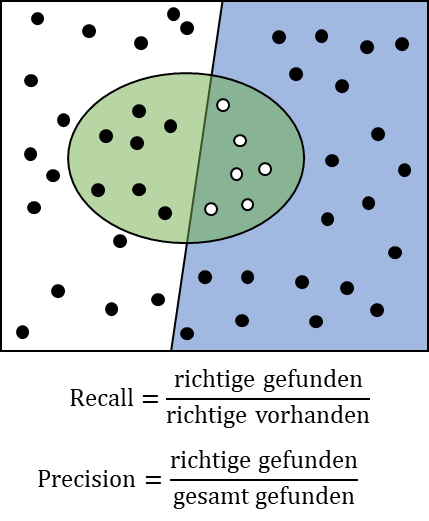

Betrachte dazu noch die Extremfälle:

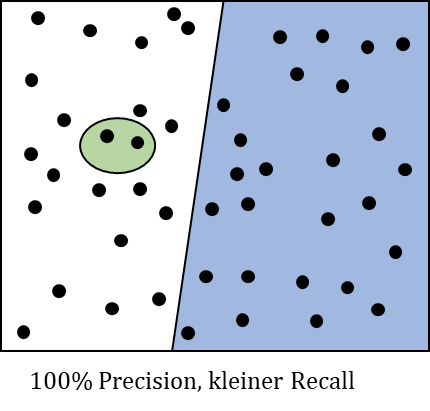


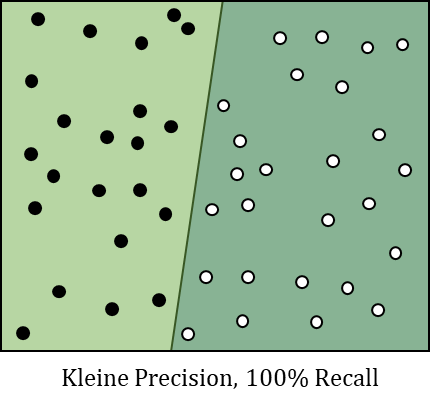

## Vergleich der Verfahren

Nachdem du nun die Bewertungskriterien verstanden hast, kannst du die unterschiedlichen Verfahren bewerten:

In [ ]:
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

res = []
for clf in [MultinomialNB(), SVC(random_state=42), SGDClassifier(random_state=42),
            RandomForestClassifier(), GradientBoostingClassifier(random_state=42),
            AdaBoostClassifier(random_state=42), DecisionTreeClassifier(random_state=42),
            MLPClassifier(random_state=42), KNeighborsClassifier()]:
    print(clf)
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    start_time = time.time()
    clf_pred = clf.predict(X_test)
    pred_time = time.time() - start_time
    res.append((str(clf), 
                precision_score(clf_pred, y_test, average="macro"),
                recall_score(clf_pred, y_test, average="macro"), 
                accuracy_score(clf_pred, y_test),
                train_time, pred_time))

Am einfachsten zeigst du die Ergebnisse als `DataFrame`:

In [ ]:
pd.DataFrame(res, columns=["classificator", "precision", "recall", "accuracy", 
                           "train_time", "pred_time"])

## Welches ist der richtige Algorithmus

Tatsächlich kannst du die Frage nun besser beantworten. Zumindst der `AdaBoostClassifier` ist wiklich ungeeignet. `SVC` hat insgesamt die beste Performance, dicht gefolgt von `KNeighborsClassifier` - letzterer ist aber bei der Klassifikation enorm langsam.

Neben den reinen Performance-Kriterien können also auch andere Kriterien eine wichtige Rolle spielen! Ein pauschale Empfehlung auszusprechen ist also eher schwierig.

Nachdem du die Erfolgsmetriken kennst, kannst du in deinem speziellen Projekt entscheiden, was am besten funktioniert.